In [3]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from itertools import combinations
from sklearn.decomposition import PCA

In [4]:
path="C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/"
pept=[x.split('_1_')[0] for x in os.listdir(path) if ((".csv" in x) and ("_1_" in x)) ]
ph=1.5574E-4


 _LDPGSPELQQVLK_2 Time 31 ==================================>


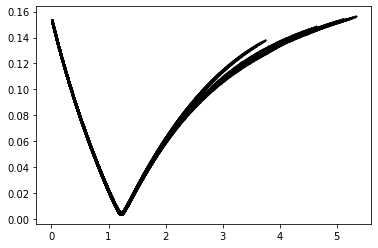

pxt*NEH = 1.21909854 real_NEH= 26 ratio = 0.04688840538461539 

vals 1.1922768337020286


In [35]:
time=31
protien="FAS_MOUSE"
pep=pept[4]
print(f"\n {pep} Time",time,"==================================>")
data=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pep}_{time}_{protien}.csv")

data["const"]=data.NEH*data.pxt
data["new_pxt"]=1-ph- (data.const/( (1-ph)*(data["exp_t_A1/A0"]-data["exp_A1/A0"]) ) )
data["new_neh"]=data.const/data.new_pxt
data=data.sort_values(by=["RMSE"],ascending=True)
data=data[data.NEH<=data.NH]

plt.scatter(data.const,data.RMSE,s=1,c='k')
#             plt.hlines(y=2.5*min(data.RMSE),xmin=min(data.const),xmax=max(data.const),color='r')
plt.show()

print("pxt*NEH =",float(data[data.RMSE==min(data.RMSE)].const),"real_NEH=",data.T_NEH[0], "ratio =",float(data[data.RMSE==min(data.RMSE)].const/data.T_NEH[0]),"\n")
print("vals",(data.loc[0,"exp_t_A1/A0"]-data.loc[0,"exp_A1/A0"])*(1-ph))

# pxt_neh.append(float(data[data.RMSE==min(data.RMSE)].const))
 
# tempdata=data[data.RMSE<2.5*min(data.RMSE)]
# tempdata=tempdata[(tempdata.new_pxt>0) & (tempdata.new_neh>0) & (tempdata.new_neh<data.NH[0])]
# tempdata["pxt_dif"]=((abs((tempdata.pxt) - (tempdata.new_pxt)))**2 + (abs((tempdata.NEH) - (tempdata.new_neh)))**2)**0.5 #(abs((tempdata.pxt) - (tempdata.new_pxt))) 
# tempdata=tempdata.sort_values(by=["pxt_dif"]) 
# neh_coll=neh_coll+list(np.array(tempdata.sort_values(by=["pxt_dif"]).new_neh.head(5)))

In [6]:
# data.sort_values(by='RMSE')
const=float(data[data.RMSE==min(data.RMSE)].const)
ria_t=float(data[data.RMSE==min(data.RMSE)].ria_t)
ria_0=float(data[data.RMSE==min(data.RMSE)].ria_0)
NH=float(data[data.RMSE==min(data.RMSE)].NH)
print(const,ria_t,ria_0,NH)

1.6966091799999998 0.0476736086059951 0.259475112862761 154.0


In [7]:
pxt=[(x/10000) for x in list(range(1,500,1))]
neh=[const/x for x in pxt]

In [8]:
# diff=[abs((1- ((ria_t/ria_0)**(1/ (const/px)))) - (px/(1-ph))) for px in pxt]
# pxt[diff.index(min(diff))]

In [9]:
diff=[abs((1 - ((ria_t/ria_0)**(1/(const/px)))) - (px/(1-ph)) ) for px in pxt]
# pxt[diff.index(min(diff))]
min(diff)

1.5768030321551356e-07

In [10]:
tempvals=pd.DataFrame()
tempvals["pxt"]=pxt
tempvals["neh"]=neh
tempvals["dif"]=diff
tempvals=tempvals[tempvals.neh<=NH]
tempvals.sort_values(by="dif")#[tempvals.dif==min(tempvals.dif)]

,pxt,neh,dif
110,0.0111,152.847674,0.000078
111,0.0112,151.482962,0.000079
112,0.0113,150.142405,0.000081
113,0.0114,148.825367,0.000082
114,0.0115,147.531233,0.000083
...,...,...,...
494,0.0495,34.274933,0.001277
495,0.0496,34.205830,0.001282
496,0.0497,34.137006,0.001287
497,0.0498,34.068457,0.001292


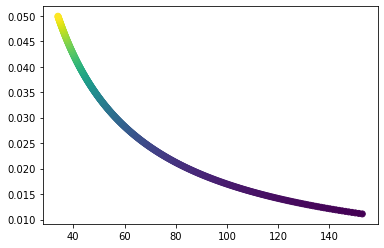

In [11]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.scatter(tempvals.neh,tempvals.pxt,c=tempvals.dif)

In [12]:
data.head()

,NEH,pxt,RMSE,theo_A1/A0,exp_A1/A0,theo_t_A1/A0,exp_t_A1/A0,NH,T_NEH,ria_0,ria_t,const,new_pxt,new_neh
15979,34,0.0499,0.019659,1.210675,1.260351,2.996963,3.115362,154,37,0.259475,0.047674,1.696609,0.085093,19.938231
16439,35,0.0489,0.019670,1.210675,1.260351,3.010755,3.115362,154,37,0.259475,0.047674,1.711509,0.077060,22.210095
15978,34,0.0498,0.019671,1.210675,1.260351,2.993196,3.115362,154,37,0.259475,0.047674,1.693209,0.086926,19.478648
16438,35,0.0488,0.019672,1.210675,1.260351,3.006885,3.115362,154,37,0.259475,0.047674,1.708009,0.078947,21.634872
16440,35,0.0490,0.019672,1.210675,1.260351,3.014626,3.115362,154,37,0.259475,0.047674,1.715009,0.075173,22.814259


In [13]:
pxt_o=[const/neh for neh in range(1,100)]
pxt_t=[(1-ph)*(1-(ria_t/ria_0)**(1/neh)) for neh in range(1,100)]
pxt_dif=(abs(np.array(pxt_o)-np.array(pxt_t))**2)*np.array(range(1,100))

In [14]:
# plt.scatter(range(99),pxt_dif)

In [68]:
protien="FAS_MOUSE"
pep=pept[15]
print(pep)
data1=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pep}_{1}_{protien}.csv")
data2=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pep}_{2}_{protien}.csv")
data3=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pep}_{24}_{protien}.csv")
data4=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pep}_{31}_{protien}.csv")

_VTAIYIDPATHR_3


In [69]:
data1.head()

,NEH,pxt,RMSE,theo_A1/A0,exp_A1/A0,theo_t_A1/A0,exp_t_A1/A0,NH,T_NEH,ria_0,ria_t
0,1,0.0030,0.023156,0.767911,0.739122,0.770921,0.869792,98,22,0.462612,0.398435
1,1,0.0031,0.023136,0.767911,0.739122,0.771021,0.869792,98,22,0.462612,0.398435
2,1,0.0032,0.023115,0.767911,0.739122,0.771122,0.869792,98,22,0.462612,0.398435
3,1,0.0033,0.023095,0.767911,0.739122,0.771223,0.869792,98,22,0.462612,0.398435
4,1,0.0034,0.023075,0.767911,0.739122,0.771323,0.869792,98,22,0.462612,0.398435


In [70]:
data2.head()

,NEH,pxt,RMSE,theo_A1/A0,exp_A1/A0,theo_t_A1/A0,exp_t_A1/A0,NH,T_NEH,ria_0,ria_t
0,1,0.0030,0.056726,0.767911,0.739122,0.770921,1.065521,98,22,0.462612,0.326415
1,1,0.0031,0.056706,0.767911,0.739122,0.771021,1.065521,98,22,0.462612,0.326415
2,1,0.0032,0.056685,0.767911,0.739122,0.771122,1.065521,98,22,0.462612,0.326415
3,1,0.0033,0.056665,0.767911,0.739122,0.771223,1.065521,98,22,0.462612,0.326415
4,1,0.0034,0.056645,0.767911,0.739122,0.771323,1.065521,98,22,0.462612,0.326415


In [71]:
ria_r=data1.ria_t[0]/data2.ria_t[0]
ria_r_12=data1.ria_t[0]/data2.ria_t[0]
ria_r_13=data1.ria_t[0]/data3.ria_t[0]
ria_r_14=data1.ria_t[0]/data4.ria_t[0]
ria_r_23=data2.ria_t[0]/data3.ria_t[0]
ria_r_24=data2.ria_t[0]/data4.ria_t[0]
ria_r_34=data3.ria_t[0]/data4.ria_t[0]

neh=range(1,100)
pxt=[(x/1000) for x in list(range(1,50,1))]

In [ ]:
res=[]
for neh in range(1,100):
    print(neh)
    for pxt1 in pxt:
        for pxt2 in [(x/1000) for x in list(range(int(pxt1*1000),50,1))]:
            for pxt3 in [(x/1000) for x in list(range(int(pxt2*1000),50,1))]:
                for pxt4 in [(x/1000) for x in list(range(int(pxt3*1000),50,1))]:
                    diff=(abs(ria_r_12 - (( (1-ph-pxt1)/(1-ph-pxt2) )** neh)))
                    diff+=(abs(ria_r_13 - (( (1-ph-pxt1)/(1-ph-pxt3) )** neh)))
                    diff+=(abs(ria_r_14 - (( (1-ph-pxt1)/(1-ph-pxt4) )** neh)))
                    diff+=(abs(ria_r_23 - (( (1-ph-pxt2)/(2-ph-pxt3) )** neh)))
                    diff+=(abs(ria_r_24 - (( (1-ph-pxt2)/(2-ph-pxt4) )** neh)))
                    diff+=(abs(ria_r_34 - (( (1-ph-pxt3)/(2-ph-pxt4) )** neh)))

                    res.append([neh,pxt1,pxt2,pxt3,pxt4,diff])          
        

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96


In [ ]:
res=pd.DataFrame(res)
res.columns=["neh","pxt1","pxt2","pxt3","pxt4","dif"]
res=res.sort_values(by="dif")
res.head(30)

In [ ]:
res["ria_0"]=data1.ria_0[0]
res["ria_t_1"]=data1.ria_t[0]
res["ria_t_2"]=data2.ria_t[0]
res["ria_t_3"]=data3.ria_t[0]
res["ria_t_4"]=data4.ria_t[0]

res["ria_t_1_e"]=res.ria_0* (1 - (res.pxt1/(1-ph)))**res.neh
res["ria_t_2_e"]=res.ria_0* (1 - (res.pxt2/(1-ph)))**res.neh
res["ria_t_3_e"]=res.ria_0* (1 - (res.pxt3/(1-ph)))**res.neh
res["ria_t_4_e"]=res.ria_0* (1 - (res.pxt4/(1-ph)))**res.neh

res["ria_diff"]=abs(res["ria_t_1"] - res["ria_t_1_e"]) + abs(res["ria_t_2"] - res["ria_t_2_e"])+ abs(res["ria_t_3"] - res["ria_t_3_e"])
res=res.sort_values(by="ria_diff")
res.head(30)

In [66]:
# original=pd.merge(pd.DataFrame([range(1,100)]).transpose(),pd.DataFrame([(x/1000) for x in list(range(1,50,1))]), how='cross')
# original.columns=["neh","pxt"]
# original

In [56]:
# m=pd.merge(original,original,how='cross',suffixes = ('_1', '_2'))
# m=m[m.neh_1==m.neh_2]
# m=m.drop(columns=["neh_2"])

# m.head()

In [57]:
# m=pd.merge(m,original,how='cross')

In [58]:
# m.head()